In [1]:
#tutorial of prophet python 
#https://www.youtube.com/watch?v=2vF2xTUXJwM
import pandas as pd 
from prophet import Prophet

#not in used yet 
import matplotlib.pyplot as plt

#evaluate the model 
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_error, mean_squared_error

Importing plotly failed. Interactive plots will not work.


In [2]:
#reading all the data 
building5 = pd.read_csv("building 5.csv")

In [3]:
building5

,Unnamed: 0,series_value,datetime,Year,Month,Day_of_Month,Hour,minutes,series_name
0,0,30.0,2019-07-25 23:00:00,2019,7,25,23,0,Building5
1,4,30.0,2019-07-26 00:00:00,2019,7,26,0,0,Building5
2,8,28.0,2019-07-26 01:00:00,2019,7,26,1,0,Building5
3,12,28.0,2019-07-26 02:00:00,2019,7,26,2,0,Building5
4,16,27.0,2019-07-26 03:00:00,2019,7,26,3,0,Building5
...,...,...,...,...,...,...,...,...,...
2958,44372,19.0,2020-10-30 04:00:00,2020,10,30,4,0,Building5
2959,44376,21.0,2020-10-30 05:00:00,2020,10,30,5,0,Building5
2960,44380,20.0,2020-10-30 06:00:00,2020,10,30,6,0,Building5
2961,44396,1.0,2020-10-30 10:00:00,2020,10,30,10,0,Building5


In [4]:
building5['datetime']=pd.to_datetime(building5['datetime'], format='%Y-%m-%d %H:%M:%S')

building5= building5.set_index('datetime')

building5= building5.asfreq('H')

<AxesSubplot:xlabel='datetime'>

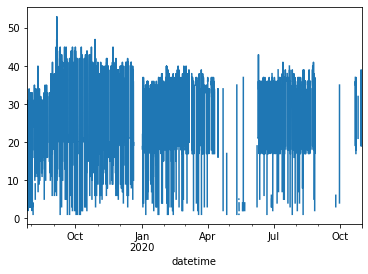

In [5]:
building5["series_value"].plot()

In [6]:
end_train='2019-12-31 23:00'

start_test='2020-01-01 00:00'

building5train = building5.loc[:end_train,:]

building5test =building5.loc[start_test:, :]

In [7]:
building5train

,Unnamed: 0,series_value,Year,Month,Day_of_Month,Hour,minutes,series_name
datetime,,,,,,,,
2019-07-25 23:00:00,0.0,30.0,2019.0,7.0,25.0,23.0,0.0,Building5
2019-07-26 00:00:00,4.0,30.0,2019.0,7.0,26.0,0.0,0.0,Building5
2019-07-26 01:00:00,8.0,28.0,2019.0,7.0,26.0,1.0,0.0,Building5
2019-07-26 02:00:00,12.0,28.0,2019.0,7.0,26.0,2.0,0.0,Building5
2019-07-26 03:00:00,16.0,27.0,2019.0,7.0,26.0,3.0,0.0,Building5
...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-31 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-31 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
building5test

,Unnamed: 0,series_value,Year,Month,Day_of_Month,Hour,minutes,series_name
datetime,,,,,,,,
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2020-10-30 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-30 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-30 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
train_b5 = building5train.reset_index()[["datetime","series_value"]]
train_b5.columns=["ds","y"]
train_b5

,ds,y
0,2019-07-25 23:00:00,30.0
1,2019-07-26 00:00:00,30.0
2,2019-07-26 01:00:00,28.0
3,2019-07-26 02:00:00,28.0
4,2019-07-26 03:00:00,27.0
...,...,...
3812,2019-12-31 19:00:00,NaN
3813,2019-12-31 20:00:00,NaN
3814,2019-12-31 21:00:00,NaN
3815,2019-12-31 22:00:00,NaN


In [10]:
model_b5 = Prophet()
model_b5.fit(train_b5)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [11]:
future_b5 = model_b5.make_future_dataframe(periods=7320,freq="H")

In [12]:
future_b5

,ds
0,2019-07-25 23:00:00
1,2019-07-26 00:00:00
2,2019-07-26 01:00:00
3,2019-07-26 02:00:00
4,2019-07-26 03:00:00
...,...
11132,2020-10-31 19:00:00
11133,2020-10-31 20:00:00
11134,2020-10-31 21:00:00
11135,2020-10-31 22:00:00


In [13]:
forecast_b5 = model_b5.predict(future_b5)

In [14]:
forecast_b5
#forecast_b5[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[-7320:] 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-07-25 23:00:00,13.671827,17.658488,41.947325,13.671827,13.671827,16.584275,16.584275,16.584275,13.573295,13.573295,13.573295,3.010979,3.010979,3.010979,0.0,0.0,0.0,30.256101
1,2019-07-26 00:00:00,13.671556,18.745541,40.880243,13.671556,13.671556,16.015780,16.015780,16.015780,13.117298,13.117298,13.117298,2.898482,2.898482,2.898482,0.0,0.0,0.0,29.687335
2,2019-07-26 01:00:00,13.671285,15.981538,40.248303,13.671285,13.671285,14.402325,14.402325,14.402325,11.636590,11.636590,11.636590,2.765736,2.765736,2.765736,0.0,0.0,0.0,28.073610
3,2019-07-26 02:00:00,13.671014,14.969659,39.746491,13.671014,13.671014,13.804428,13.804428,13.804428,11.192710,11.192710,11.192710,2.611719,2.611719,2.611719,0.0,0.0,0.0,27.475442
4,2019-07-26 03:00:00,13.670743,16.631814,40.253500,13.670743,13.670743,14.596840,14.596840,14.596840,12.161284,12.161284,12.161284,2.435555,2.435555,2.435555,0.0,0.0,0.0,28.267583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11132,2020-10-31 19:00:00,7.190425,-25.195700,-1.437279,6.352464,8.027900,-20.863152,-20.863152,-20.863152,-10.750607,-10.750607,-10.750607,-10.112545,-10.112545,-10.112545,0.0,0.0,0.0,-13.672727
11133,2020-10-31 20:00:00,7.189786,-18.275167,4.620048,6.351570,8.027495,-13.958518,-13.958518,-13.958518,-4.001894,-4.001894,-4.001894,-9.956624,-9.956624,-9.956624,0.0,0.0,0.0,-6.768732
11134,2020-10-31 21:00:00,7.189148,-11.038999,13.766241,6.350677,8.027090,-5.498248,-5.498248,-5.498248,4.261246,4.261246,4.261246,-9.759494,-9.759494,-9.759494,0.0,0.0,0.0,1.690900
11135,2020-10-31 22:00:00,7.188509,-2.937286,20.472302,6.349783,8.026686,1.257428,1.257428,1.257428,10.779796,10.779796,10.779796,-9.522368,-9.522368,-9.522368,0.0,0.0,0.0,8.445937


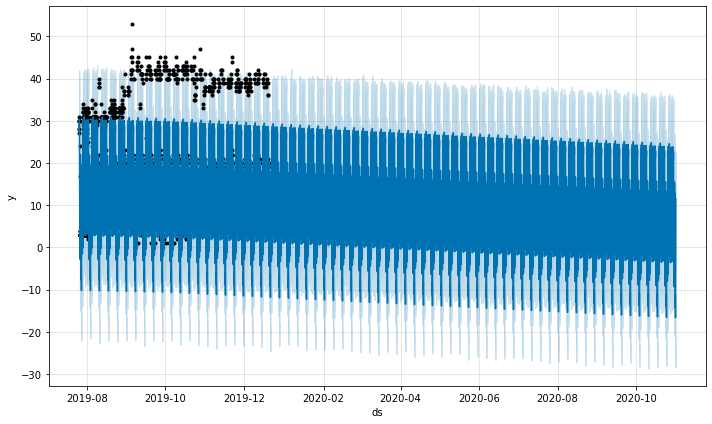

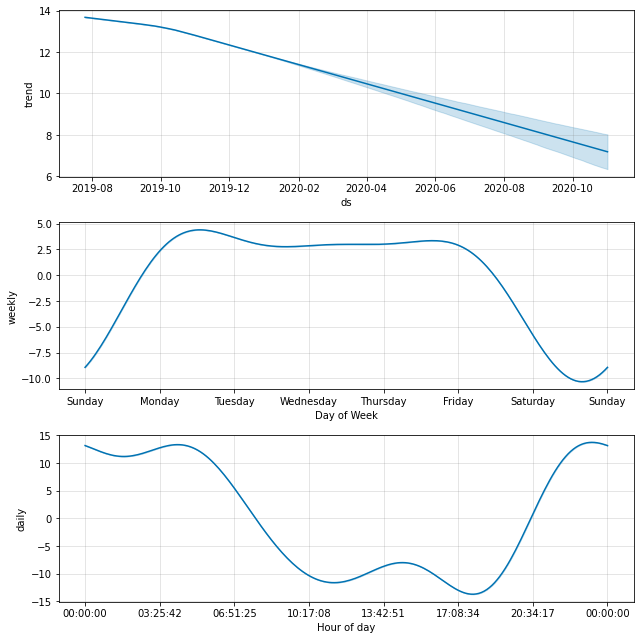

In [15]:
# plot the prediction 
fig= model_b5.plot(forecast_b5)
#plot predictions 
fig= model_b5.plot_components(forecast_b5)

In [16]:
forecast_b5["additive_terms"]
additive_terms =  pd.DataFrame(forecast_b5["additive_terms"])
additive_terms

,additive_terms
0,16.584275
1,16.015780
2,14.402325
3,13.804428
4,14.596840
...,...
11132,-20.863152
11133,-13.958518
11134,-5.498248
11135,1.257428


In [17]:
building5["series_value"]
actual_value = pd.DataFrame(building5.reset_index()["series_value"])
actual_value

,series_value
0,30.0
1,30.0
2,28.0
3,28.0
4,27.0
...,...
11107,NaN
11108,NaN
11109,NaN
11110,NaN


In [18]:
sub =actual_value["series_value"]-additive_terms["additive_terms"]

output =  pd.DataFrame(building5.reset_index()["datetime"])
output["subtraction"] = sub
output["additive_terms"] = forecast_b5["additive_terms"]
output["actual_value"] = actual_value["series_value"]
output = output.dropna()

output 


,datetime,subtraction,additive_terms,actual_value
0,2019-07-25 23:00:00,13.415725,16.584275,30.0
1,2019-07-26 00:00:00,13.984220,16.015780,30.0
2,2019-07-26 01:00:00,13.597675,14.402325,28.0
3,2019-07-26 02:00:00,14.195572,13.804428,28.0
4,2019-07-26 03:00:00,12.403160,14.596840,27.0
...,...,...,...,...
11093,2020-10-30 04:00:00,3.541239,15.458761,19.0
11094,2020-10-30 05:00:00,6.349271,14.650729,21.0
11095,2020-10-30 06:00:00,8.631508,11.368492,20.0
11099,2020-10-30 10:00:00,10.078752,-9.078752,1.0


In [19]:
output.to_csv("b5_actual_additive.csv",index=False)